# <font color='#FFE15D'>**Week 7: Geometric Transformations**</font> 

## <span style="font-size: 0.9em;">🟥</span> **Section 0: Import**

In [21]:
import  cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
cv2.__version__

'4.6.0'

## <span style="font-size: 0.9em;">🟥</span> **Section 1: from Scratch**

In [3]:
img = cv2.imread('data/t.jpg')

cv2.imshow('Example Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

### <span style="font-size: 0.9em;">🟧</span> **Rotate**

### <span style="font-size: 0.9em;">🟪</span> **Implement rotation using vectorization techniques**

In [4]:
def rotate_image_vectorized(img, angle):
    rad = np.deg2rad(angle)

    rotation_matrix = np.array([
         [np.cos(rad), -np.sin(rad)],
         [np.sin(rad), np.cos(rad)]
    ])

    inv_rotation_matrix = np.linalg.inv(rotation_matrix)
    
    height, width = img.shape[:2]
    x_center, y_center = width // 2, height // 2
    
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    
    xy_coords = np.vstack((x.flatten() - x_center, y.flatten() - y_center))
    
    x_src, y_src =  inv_rotation_matrix @ xy_coords
    
    x_src = (np.round(x_src + x_center)).astype(int)
    y_src = (np.round(y_src + y_center)).astype(int)
    
    rot_img = np.zeros_like(img)
    
    mask = (x_src >= 0) & (x_src < width) & (y_src >= 0) & (y_src < height)
    
    rot_img[y.flatten()[mask], x.flatten()[mask]] = img[y_src[mask], x_src[mask]]

    return rot_img

In [6]:
img = cv2.imread('data/t.jpg')

angle = 60
rotated_img = rotate_image_vectorized(img, angle)

cv2.imshow("Image", img)
cv2.imshow("Rotated Image", rotated_img)
cv2.waitKey()
cv2.destroyAllWindows()

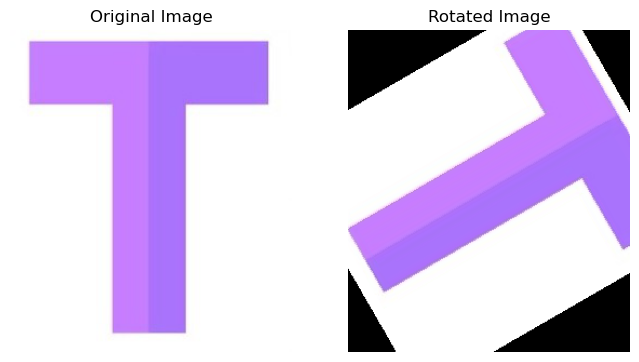

In [19]:
angle = 60
img = cv2.imread('data/t.jpg')
rotated_img = rotate_image_vectorized(img, angle)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rotated_img_rgb = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_img_rgb)
plt.axis('off');

### <span style="font-size: 0.9em;">🟪</span> **Implement rotation so that the resulting image is larger than input image**

- **Different modes of image rotation:**

1. Rotated Image with Same Size of Input Image
2. Rotated Image Larger than Input (No Loss of Input Area)

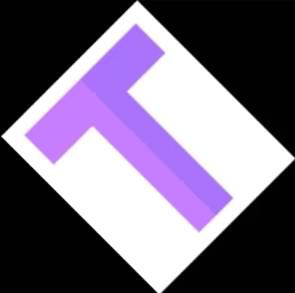

By calculating the new dimensions of the bounding box after rotation, we can determine the size of the resulting image that will completely encompass the rotated original image.

#### **Original Image and Rotation**

##### * **Define Rotation Matrix and Inverse Rotation Matrix**

##### * **Calculate New Dimensions:**
- The corners of the original image are defined relative to the center.
  
  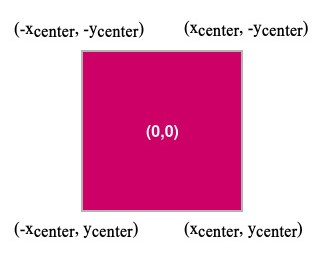
  
- These corners are rotated using the rotation matrix.
- The minimum and maximum x and y coordinates of the rotated corners are found.
- The new dimensions of the rotated image are calculated based on the extent of the rotated corners.
Offsets are calculated to position the new image center correctly.

##### * **Create an Empty Image**

##### * **Mapping Pixels:**
- For each pixel in the new image, its coordinates are adjusted by the offset to align with the center.
- The inverse rotation matrix is used to map these coordinates back to the original image coordinates.
- If the mapped coordinates fall within the bounds of the original image, the corresponding pixel value is copied to the new image.

In [8]:
def rotate_image(img, angle):
    rad = np.deg2rad(angle)

    rotation_matrix = np.array([
         [np.cos(rad), -np.sin(rad)],
         [np.sin(rad), np.cos(rad)]
    ])

    inv_rotation_matrix = np.linalg.inv(rotation_matrix)

    height, width = img.shape[:2]
    x_center, y_center = width // 2, height // 2

    corners = np.array([
        [-x_center, -y_center],
        [x_center, -y_center],
        [x_center, y_center],
        [-x_center, y_center]
    ])
    
    rotated_corners = (rotation_matrix @ corners.T).T
    min_x, min_y = rotated_corners.min(axis=0)
    max_x, max_y = rotated_corners.max(axis=0)

    new_width = int(np.ceil(max_x - min_x))
    new_height = int(np.ceil(max_y - min_y))

    x_offset = new_width // 2
    y_offset = new_height // 2

    rot_img = np.zeros((new_height, new_width, img.shape[2]), dtype=np.uint8)

    for y in range(new_height):
        for x in range(new_width):
            xy_coords = np.array([[x - x_offset], [y - y_offset]])

            x_src, y_src = inv_rotation_matrix @ xy_coords
            x_src = int(np.round(x_src[0] + x_center))
            y_src = int(np.round(y_src[0] + y_center))

            if (0 <= x_src < width) and (0 <= y_src < height):
                rot_img[y, x] = img[y_src, x_src]

    return rot_img

In [11]:
img = cv2.imread('data/t.jpg')

angle = 60
rotated_img = rotate_image(img, angle)
print(f'Image Shape: {img.shape}, \nRotated Image Shape: {rotated_img.shape}')

cv2.imshow("Image", img)
cv2.imshow("Rotated Image", rotated_img)
cv2.waitKey()
cv2.destroyAllWindows()

Image Shape: (298, 261, 3), 
Rotated Image Shape: (375, 389, 3)


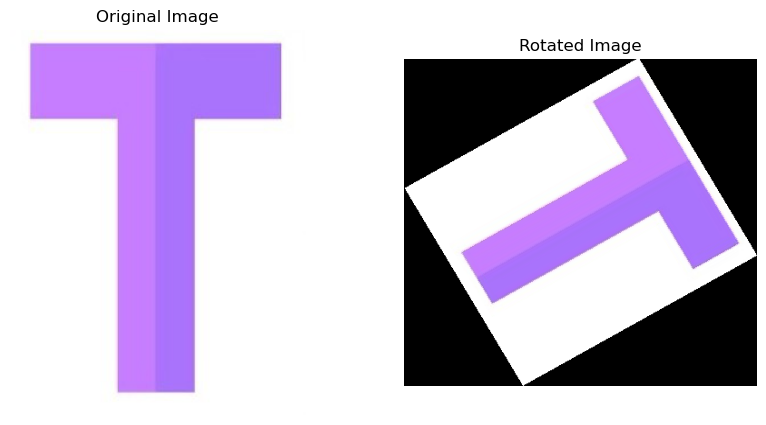

In [20]:
angle = 60
img = cv2.imread('data/t.jpg')
rotated_img = rotate_image(img, angle)

height, width = img.shape[:2]
rotated_height, rotated_width = rotated_img.shape[:2]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[0].set_aspect(height / width)

axs[1].imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Rotated Image')
axs[1].axis('off')
axs[1].set_aspect(rotated_height / rotated_width);

#### <span style="font-size: 0.9em;">🟪</span> **Resize**

In [13]:
def resize_image(img, s_x, s_y):
   
    resize_matrix = np.array([
         [s_x, 0],
         [0, s_y]
    ])
    
    inv_resize_matrix = np.linalg.inv(resize_matrix)
    
    height, width = img.shape[:2]

    new_width = int(width * s_x)
    new_height = int(height * s_y)
    x_center, y_center = new_width // 2, new_height // 2
    
    resized_img = np.zeros((new_height, new_width, img.shape[2]), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            xy_coords = np.array([[x ], [y ]])
    
            x_src, y_src = inv_resize_matrix @ xy_coords
    
            x_src = int(np.round(x_src[0]))
            y_src = int(np.round(y_src[0]))
    
            if (x_src < width) and (y_src < height):
                resized_img[y, x] = img[y_src, x_src]
    return resized_img

In [14]:
a, b = 2, 2

img = cv2.imread('data/t.jpg')
resized_img = resize_image(img, a, b)
height, width  = img.shape[:2]
resized_height, resized_width = resized_img.shape[:2]
print(f'Original Image Shape: {img.shape}, \nResize Image Shape: {resized_img.shape}')

cv2.imshow("Original Image", img)
cv2.imshow("Resized Image", resized_img)
cv2.waitKey()
cv2.destroyAllWindows()

Original Image Shape: (298, 261, 3), 
Resize Image Shape: (596, 522, 3)


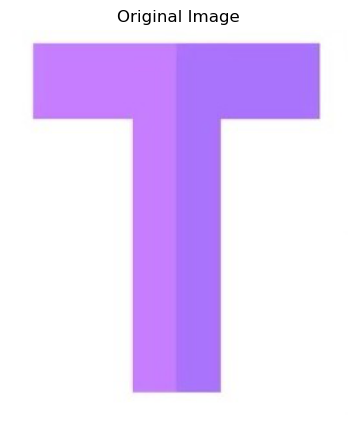

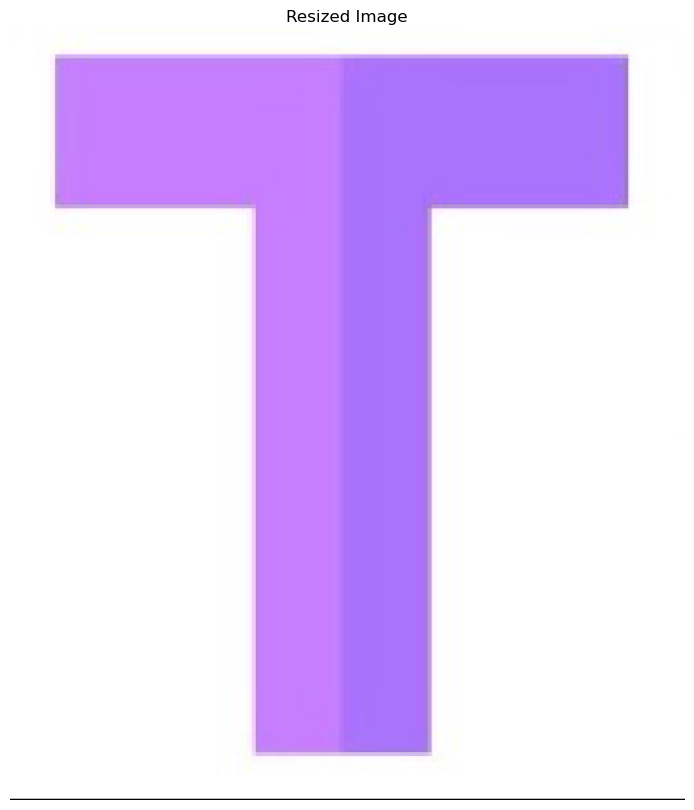

In [15]:
dpi = 50
plt.figure(figsize=(height // dpi, width // dpi))
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.figure(figsize=(resized_height // dpi, resized_width  // dpi))
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off');

### <span style="font-size: 0.9em;">🟪</span> **Flip**

In [23]:
def flip_image(img, axis):
   
    if axis == 0:
        flip_matrix = np.array([[-1, 0], [0, 1]])
    elif axis == 1:
        flip_matrix = np.array([[1, 0], [0, -1]])
    elif axis == -1:
        flip_matrix = np.array([[-1, 0], [0, -1]])
        
    else:
        raise ValueError("Invalid axis! Use 0 for vertical flip and 1 for horizontal flip and -1 for both axes")
    
    height, width = img.shape[:2]
    
    flip_img = np.zeros_like(img)
    
    for y in range(height):
        for x in range(width):
            xy_coords = np.array([[x], [y]])
    
            x_src, y_src = flip_matrix @ xy_coords
    
            flip_img[y, x] = img[y_src, x_src]
            
    return flip_img

In [24]:
img = cv2.imread('data/f.jpg')
flip_img_vertically = flip_image(img, 0)
flip_img_horizontally = flip_image(img, 1)
flip_img = flip_image(img, -1)

cv2.imshow("Original Image", img)
cv2.imshow("Flip image Horizontally ", flip_img_horizontally)
cv2.imshow("Flip Image Vertically ", flip_img_vertically)
cv2.imshow("Flip Image", flip_img)
cv2.waitKey()
cv2.destroyAllWindows()

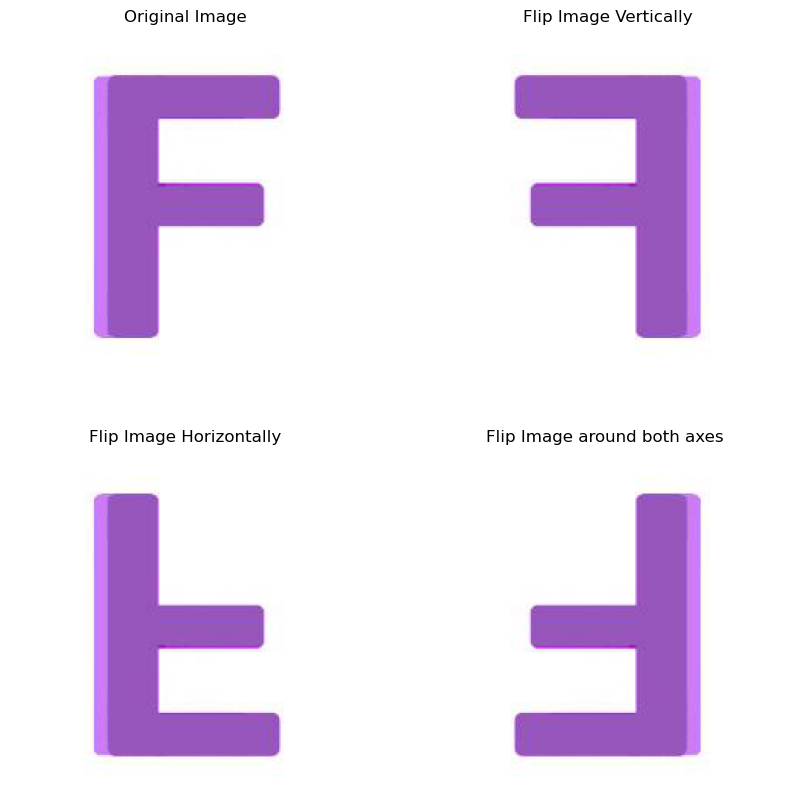

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off');

axs[0, 1].imshow(cv2.cvtColor(flip_img_vertically, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Flip Image Vertically')
axs[0, 1].axis('off');

axs[1, 0].imshow(cv2.cvtColor(flip_img_horizontally, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Flip Image Horizontally')
axs[1, 0].axis('off');

axs[1, 1].imshow(cv2.cvtColor(flip_img, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Flip Image around both axes ')
axs[1, 1].axis('off');